### More in-depth on `GridPlot`

In [1]:
import numpy as np
from fastplotlib.layouts import GridPlot

RFBOutputContext()


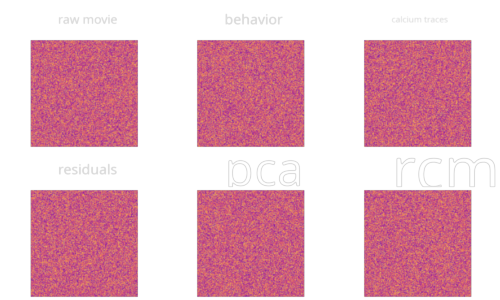

JupyterWgpuCanvas()

In [2]:
# grid with 2 rows and 3 columns
grid_shape = (2, 3)

# pan-zoom controllers for each view
# views are synced if they have the 
# same controller ID
controllers = [
    [0, 3, 1],  # id each controller with an integer
    [2, 2, 3]
]


# you can give string names for each subplot within the gridplot
names = [
    ["raw movie", "behavior", "calcium traces"],
    ["residuals", "pca", "rcm"]
]

# Create the grid plot
grid_plot = GridPlot(
    shape=grid_shape,
    controllers=controllers,
    names=names,
)


# Make a random image graphic for each subplot
for subplot in grid_plot:
    data = np.random.rand(512, 512)
    # create and add an ImageGraphic
    subplot.add_image(data=data, name="rand-image")
    

# Define a function to update the image graphics 
# with new randomly generated data
def set_random_frame(gp):
    for subplot in gp:
        new_data = np.random.rand(512, 512)
        subplot["rand-image"].data = new_data

# add the animation
grid_plot.add_animations(set_random_frame)
grid_plot.show()

### Indexing the gridplot to access subplots

In [3]:
# as before you can index by position
grid_plot[0, 2]

calcium traces: Subplot @ 0x7f128093e1f0
  parent: None
  Graphics:
	'rand-image': ImageGraphic @ 0x7f1280830550

In [4]:
# you can also access subplots by name
grid_plot["calcium traces"]

calcium traces: Subplot @ 0x7f128093e1f0
  parent: None
  Graphics:
	'rand-image': ImageGraphic @ 0x7f1280830550

In [5]:
# view its position
grid_plot["calcium traces"].position

(0, 2)

In [6]:
# these are really the same
grid_plot["calcium traces"] is grid_plot[0, 2]

True

## subplots also support indexing!
this can be used to get graphics if they are named

In [7]:
# can access graphic directly via name
grid_plot["rcm"]["rand-image"]

'rand-image': ImageGraphic @ 0x7f1280841ca0

### Indexing with subplot name and graphic name

In [8]:
# can change properties as well
grid_plot["rcm"]["rand-image"].vmin = 0.5

In [9]:
grid_plot["raw movie"]["rand-image"].vmin = 0.6
grid_plot["raw movie"]["rand-image"].vmax = 0.8

### positional indexing also works event if subplots have string names

In [10]:
grid_plot[1, 0]["rand-image"].vim = 0.1
grid_plot[1, 0]["rand-image"].vmax = 0.3